<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/udemy/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram,fcluster

## k-means

In [2]:
# データ読み込み
df = sns.load_dataset('iris')

X = df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 標準化
X_scaled = StandardScaler().fit_transform(X)

In [4]:
# k-means学習
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [5]:
# k-means予測
labels = kmeans.predict(X_scaled)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## k-meansの結果を描画

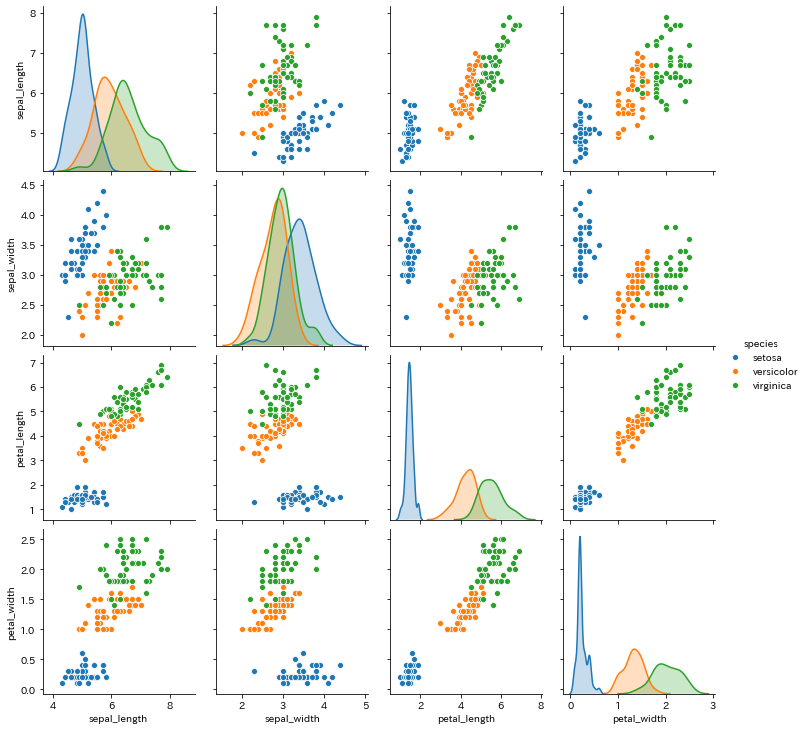

In [6]:
# データセットの散布図
sns.pairplot(df, hue='species')

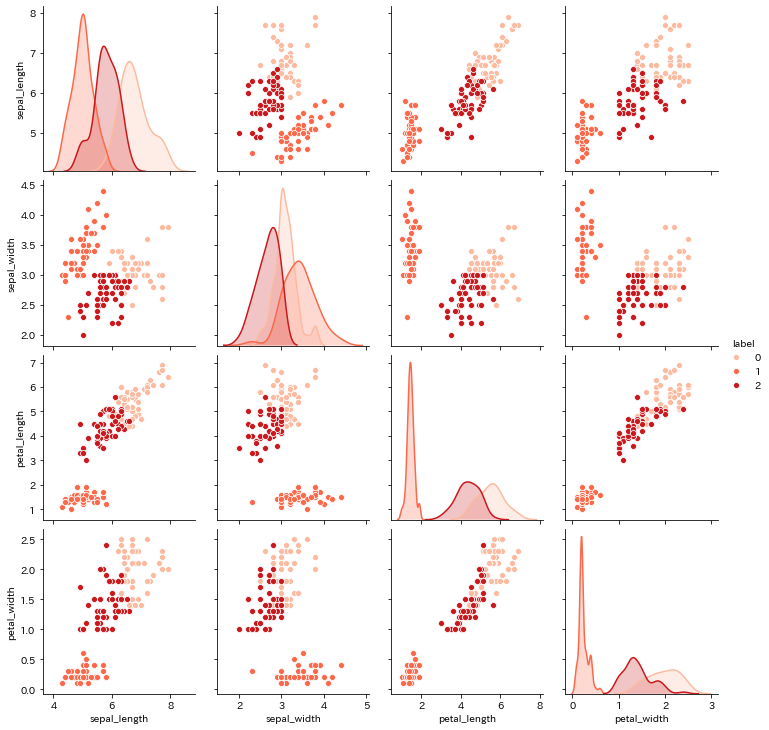

In [7]:
# クラスタリング結果の散布図
km_df = pd.concat([X, pd.DataFrame({'label':labels})], axis=1)
sns.pairplot(km_df, hue='label', palette='Reds')

## 損失関数

In [8]:
# K=1~9で損失関数計算
k_list = range(1, 10)
losses = []
for K in k_list:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X_scaled)
    losses.append(np.abs(kmeans.score(X_scaled)))

In [9]:
plt.plot(K_list,losses)
# ラベル定義
plt.xlabel('K')
plt.ylabel('Loss')
# タイトル
plt.title('K vs Loss')

NameError: name 'K_list' is not defined

## 階層クラスタリング

In [ ]:
# 階層的クラスタリング
Z = linkage(X_scaled, method='ward')

### クラスタリングのフローの見方
13回目に生成したクラスタは、
X_scaled[40]、X_scaled[0]、X_scaled[17]から構成

In [ ]:
# 13回目に生成したクラスタ
Z[13]

In [ ]:
# 13回目に生成したクラスタの要素（データ）
X_scaled[40]

In [ ]:
# 13回目に生成したクラスタの要素（クラスタ）
Z[154-len(X_scaled)]

### デンドログラム

In [ ]:
# lastp：最終クラス数指定で描画
d = dendrogram(Z, truncate_mode='lastp', p=5)

In [ ]:
# lastp：クラスタ生成回数指定で描画
d = dendrogram(Z, truncate_mode='level', p=2)

## 階層クラスタリングの結果を描画

In [ ]:
# データセットの散布図
sns.pairplot(df, hue='species')

In [ ]:
# クラスタリング結果の散布図
hc_df = pd.concat([X, pd.DataFrame({'label':labels})], axis=1)
sns.pairplot(hc_df, hue='label', palette='Reds')